# Clustering Analysis of FIFA 22 Player Data

## Introduction
The following notebook demonstrates a clustering analysis on FIFA 22 player data. The data includes various attributes of players from FIFA 15 to FIFA 22, enabling multiple comparisons across different game versions. The main goal of this analysis is to identify clusters of players with similar characteristics using the K-means clustering algorithm.

## Objectives Achieved in the Analysis

1. **Data Cleaning and Preparation:**
   - Successfully loaded the FIFA 22 player data and selected relevant features for clustering.
   - Handled missing values to ensure a clean dataset for analysis.

2. **Feature Standardization:**
   - Standardized the selected features to ensure equal contribution to the clustering process.

3. **Dimensionality Reduction:**
   - Applied Principal Component Analysis (PCA) to reduce the dimensionality of the data, retaining the most significant variance.

4. **Optimal Number of Clusters:**
   - Utilized the elbow method to determine the optimal number of clusters for K-means clustering.

5. **K-means Clustering:**
   - Performed K-means clustering on the reduced data to group players into distinct clusters.

6. **Cluster Visualization:**
   - Visualized the clusters in a 2D PCA space to understand the distribution and separation of player groups.

7. **Cluster Characterization:**
   - Analyzed the characteristics of each cluster by calculating the mean values of the original features for each group, providing insights into different types of players.

## Conclusion
The clustering analysis on FIFA 22 player data identified four distinct groups of players based on their overall rating, potential, wage, value, and age. The use of PCA for dimensionality reduction facilitated the visualization of these clusters. Each cluster exhibits unique characteristics, providing insights into different types of players present in the game. This analysis can be valuable for understanding player segments and making strategic decisions in team management and player development within the game. ​

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from IPython.display import clear_output
from sklearn.cluster import KMeans

In [2]:
# Load the dataset
# Here we load the FIFA 22 player data into a pandas DataFrame
players = pd.read_csv(r'C:\Users\User\Desktop\Data Science Proyect\K-means Clustering - FIFA\dataset\players_22.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_20896\2522937474.py:3: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv(r'C:\Users\User\Desktop\Data Science Proyect\K-means Clustering - FIFA\dataset\players_22.csv')


In [3]:
players

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [4]:
# Select relevant features for clustering
# We choose 'overall', 'potential', 'wage_eur', 'value_eur', and 'age' as our features for clustering
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [5]:
# Drop rows with missing values in the selected features
# This ensures that the dataset we use for clustering is complete and clean
players = players.dropna(subset= features)

In [6]:
data = players[features].copy()

In [7]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [8]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [9]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [11]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [12]:
centroids = random_centroids(data, 5)

C:\Users\User\AppData\Local\Temp\ipykernel_20896\1845334667.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [13]:
centroids

,0,1,2,3,4
overall,6.478261,7.260870,7.652174,3.739130,2.565217
potential,6.869565,4.521739,4.913043,5.891304,8.434783
wage_eur,1.682403,1.038627,1.193133,1.888412,1.038627
value_eur,1.152682,1.143404,1.078452,1.023939,1.171240
age,5.333333,1.666667,2.000000,8.000000,5.000000


In [14]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [15]:
labels = get_labels(data, centroids)

In [16]:
labels.value_counts()

0    10011
1     3811
3     2872
4     2218
2      253
Name: count, dtype: int64

In [17]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [18]:
# Apply PCA for dimensionality reduction
# We use PCA to reduce the dimensionality of the data while retaining most of the variance
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

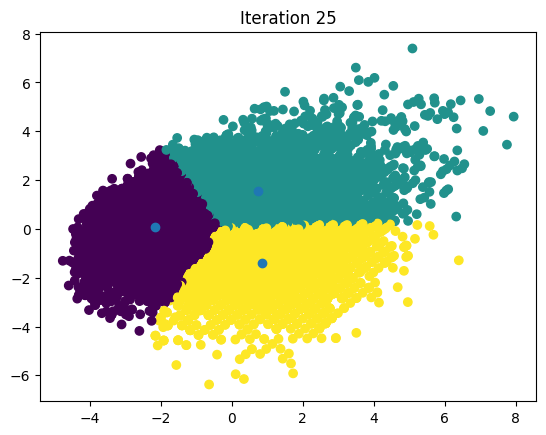

In [19]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [20]:
centroids

,0,1,2
overall,3.206838,5.806043,4.784633
potential,4.928473,6.497993,4.506962
wage_eur,1.028505,1.420001,1.118904
value_eur,1.026614,1.285501,1.044980
age,2.518708,3.596161,5.472247


In [21]:
labels.value_counts()

2    7173
0    6223
1    5769
Name: count, dtype: int64

In [22]:
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
7025,Sandeiro Leal,68,68,7000.0,1400000.0,21
8028,Narcisso Mau,67,67,4000.0,1100000.0,21
8029,Botelhinonsa,67,67,4000.0,1100000.0,21
8030,Edenildo Lagoas,67,67,3000.0,1100000.0,21
8040,Dener Rolim,67,67,4000.0,1200000.0,21
...,...,...,...,...,...,...
19234,Song Defu,47,52,1000.0,70000.0,22
19235,C. Porter,47,59,500.0,110000.0,19
19236,N. Logue,47,55,500.0,100000.0,21
19237,L. Rudden,47,60,500.0,110000.0,19


In [23]:
# Perform K-means clustering with the chosen number of clusters
# Here we choose 4 clusters based on the elbow plot
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [24]:
centroids = kmeans.cluster_centers_

In [25]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,4.814785,6.200672,3.583423
potential,4.512904,6.612882,5.188940
wage_eur,1.115077,1.645851,1.039066
value_eur,1.040570,1.408071,1.035008
age,5.628070,4.098783,2.714809
